## Python 数据可视化分析

---

#### 介绍

在机器学习领域中，可视化是十分重要的。
在开始一项新任务时，通过可视化手段探索数据能更好地帮助人们把握数据的要点。
在分析模型表现和模型报告的结果时，可视化能使分析显得更加生动鲜明。
有时候，为了理解复杂的模型，我们还可以将高维空间映射为视觉上更直观的二维或三维图形。

总而言之，可视化是一个相对快捷的从数据中挖掘信息的手段。
本文将使用 Pandas、Matplotlib、seaborn 等流行的库，带你上手可视化。

#### 知识点

- 单变量可视化的常用方法
- 多变量可视化的常用方法
- t-SNE



### 数据集

首先使用 `import` 载入相关依赖。

In [34]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings("ignore")

加载电信运营商客服数据<br />
[电信运营商数据集](https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv)

In [35]:
df = pd.read_csv(r"https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


最后一个数据列 Churn 离网率 是我们的目标特征，
它是布尔变量，其中 True 表示公司最终丢失了此客户，
False 表示客户被保留。<br />
稍后，将构建基于其他特征预测 Churn 特征的模型。

### 单变量可视化

单变量（univariate）分析一次只关注一个变量。
当我们独立地分析一个特征时，通常最关心的是该特征值的分布情况。
下面考虑不同统计类型的变量，以及相应的可视化工具。

#### 数量特征

数量特征（quantitative feature）的值为有序数值。这些值可能是离散的，例如整数，也可能是连续的，例如实数。


#### 直方图和密度图

直方图依照相等的间隔将值分组为柱，它的形状可能包含了数据分布的一些信息，
如高斯分布、指数分布等。当分布总体呈现规律性，
但有个别异常值时，你可以通过直方图辨认出来。
当你使用的机器学习方法预设了某一特定分布类型（通常是高斯分布）时，
知道特征值的分布是非常重要的。

最简单的查看数值变量分布的方法是使用 DataFrame 的
[<i class="fa fa-external-link-square" aria-hidden="true"> `hist()`</i>](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) 方法绘制直方图。

array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

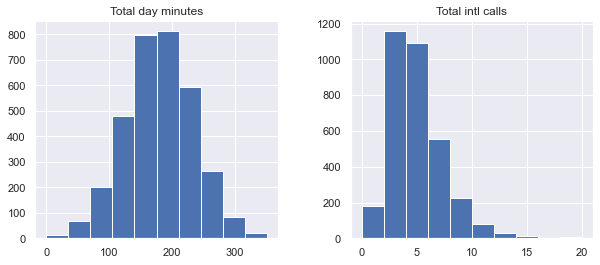

In [36]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4))

上图表明，变量 Total day minutes 每日通话时长 呈高斯分布，
而 Total intl calls 总国际呼叫数 显著右倾（它右侧的尾巴更长）。


密度图（density plots），也叫核密度图（ [<i class="fa fa-external-link-square" aria-hidden="true"> kernel density estimate</i>](https://en.wikipedia.org/wiki/Kernel_density_estimation)，KDE）
是理解数值变量分布的另一个方法。
它可以看成是直方图平滑（ [<i class="fa fa-external-link-square" aria-hidden="true"> smoothed</i>](https://en.wikipedia.org/wiki/Kernel_smoother) ）的版本。
相比直方图，它的主要优势是不依赖于柱的尺寸，更加清晰。

让我们为上面两个变量创建密度图。

array([[<AxesSubplot:title={'center':'Total day minutes'}, ylabel='Density'>,
        <AxesSubplot:title={'center':'Total intl calls'}, ylabel='Density'>]],
      dtype=object)

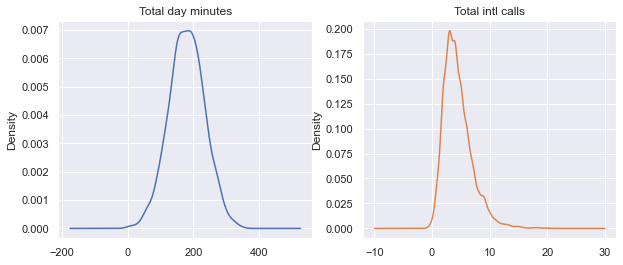

In [37]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4), legend=False, title=features)

seaborn 的 `distplot()` 绘制分布。同时显示直方图和密度图。

<AxesSubplot:xlabel='Total intl calls', ylabel='Density'>

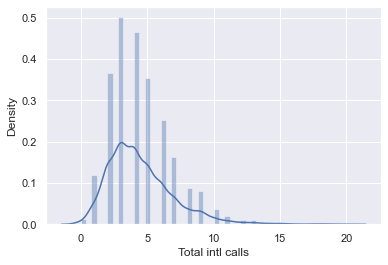

In [38]:
sns.distplot(df["Total intl calls"])

上图中直方图的柱形高度已进行归一化处理，表示的是密度而不是样本数。

绘制箱型图和提琴图

sns 常用画图函数
- `distplot()`
- `countplot()`
- `boxplot()`
- `violinplot()`

箱体图，即箱线图，从下到上五条线分别表示最小值、下四分位数、中位数、上四分位数和最大值。

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

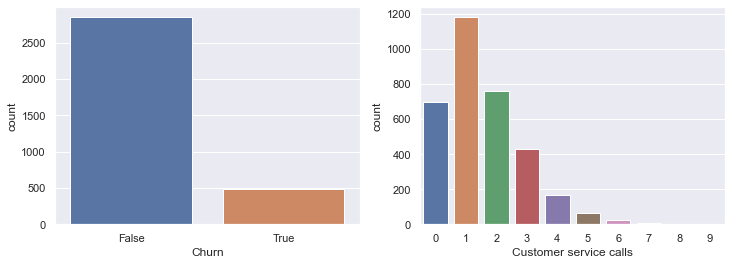

In [39]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

<AxesSubplot:>

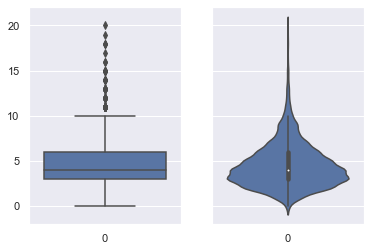

In [40]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

### 数据描述
#### 频率表

`describe()`
`value_counts()`

In [41]:
df["Total intl calls"].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

In [42]:
df["Total intl calls"].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
17      1
20      1
19      1
Name: Total intl calls, dtype: int64

#### 类别特征和二元特征

类别特征（categorical features take）反映了样本的某个定性属性，它具有固定数目的值，
每个值将一个观测数据分配到相应的组，这些组称为类别（category）。
如果类别变量的值具有顺序，称为有序（ordinal）类别变量。<br />
二元（binary）特征是类别特征的特例，其可能值有 2 个。


### 多变量可视化

多变量（multivariate）图形可以在单张图像中查看两个以上变量的联系，和单变量图形一样，可视化的类型取决于将要分析的变量的类型。<br />

先来看看数量变量之间的相互作用。

#### 相关矩阵

相关矩阵可揭示数据集中的数值变量的相关性。这一信息很重要，因为有一些机器习算法（比如，线性回归和逻辑回归）不能很好地处理高度相关的输入变量。

首先我们使用DataFrame的[<i class="fa fa-external-link-square" aria-hidden="true">`corr()`</i>](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
方法计算出每一个特征间的相关性->相关矩阵（correlation matrix）传给seaborn 的 `heatmap()` 的方法，
该方法根据提供的数值，渲染出彩色编码矩阵。

In [43]:
# 丢弃非数值变量
numerical = list(set(df.columns)-set([
    'State', 'International plan', 'Voice mail plan',
    'Area code', 'Churn', 'Customer service calls']))
# set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，
# 还可以计算交集、差集、并集等。

<AxesSubplot:>

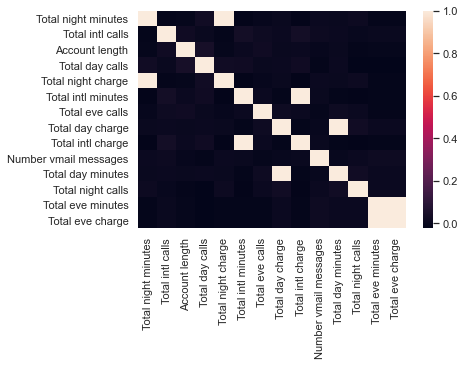

In [44]:
# 计算和绘图
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

上图中，Total day charge 日话费总额 是直接基于 Total day minutes 电话的分钟数 计算得到，它被称为因变量。除了 Total day charge 外，还有 3 个因变量：Total eve charge，Total night charge，Total intl charge。这 4 个因变量并不贡献任何额外信息，我们直接去除。

In [45]:
numerical = list(set(numerical) - set([
    'Total day charge', 'Total eve charge',
    'Total night charge', 'Total intl charge']))



#### 散点图

散点图（scatter plot）将两个数值变量的值显示为二维空间中的笛卡尔坐标（Cartesian coordinate）。通过 matplotlib 库的 [<i class="fa fa-external-link-square" aria-hidden="true"> `scatter()`</i>](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) 方法可以绘制散点图。

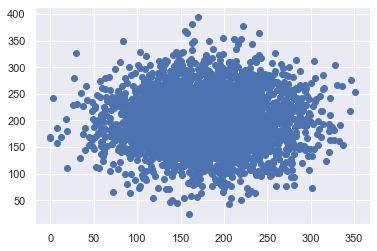

In [46]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

seaborn 库的 [<i class="fa fa-external-link-square" aria-hidden="true"> `jointplot()`</i>](https://seaborn.pydata.org/generated/seaborn.jointplot.html) 方法在绘制散点图的同时会绘制两张直方图，某些情形下它们可能会更有用。

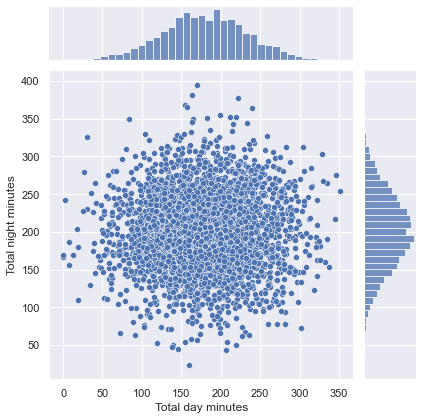

In [47]:
sns.jointplot(x="Total day minutes", y="Total night minutes",
              data=df, kind="scatter")

`jointplot()` 方法还可以绘制平滑过的散点直方图。

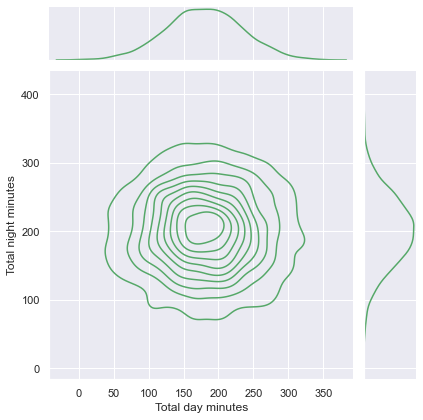

In [48]:
sns.jointplot(x="Total day minutes", y="Total night minutes",
              data=df, kind='kde', color="g")

#### 散点图矩阵

在某些情形下，我们可能想要绘制如下所示的散点图矩阵（scatterplot matrix）。它的对角线包含变量的分布，并且每对变量的散点图填充了矩阵的其余部分。

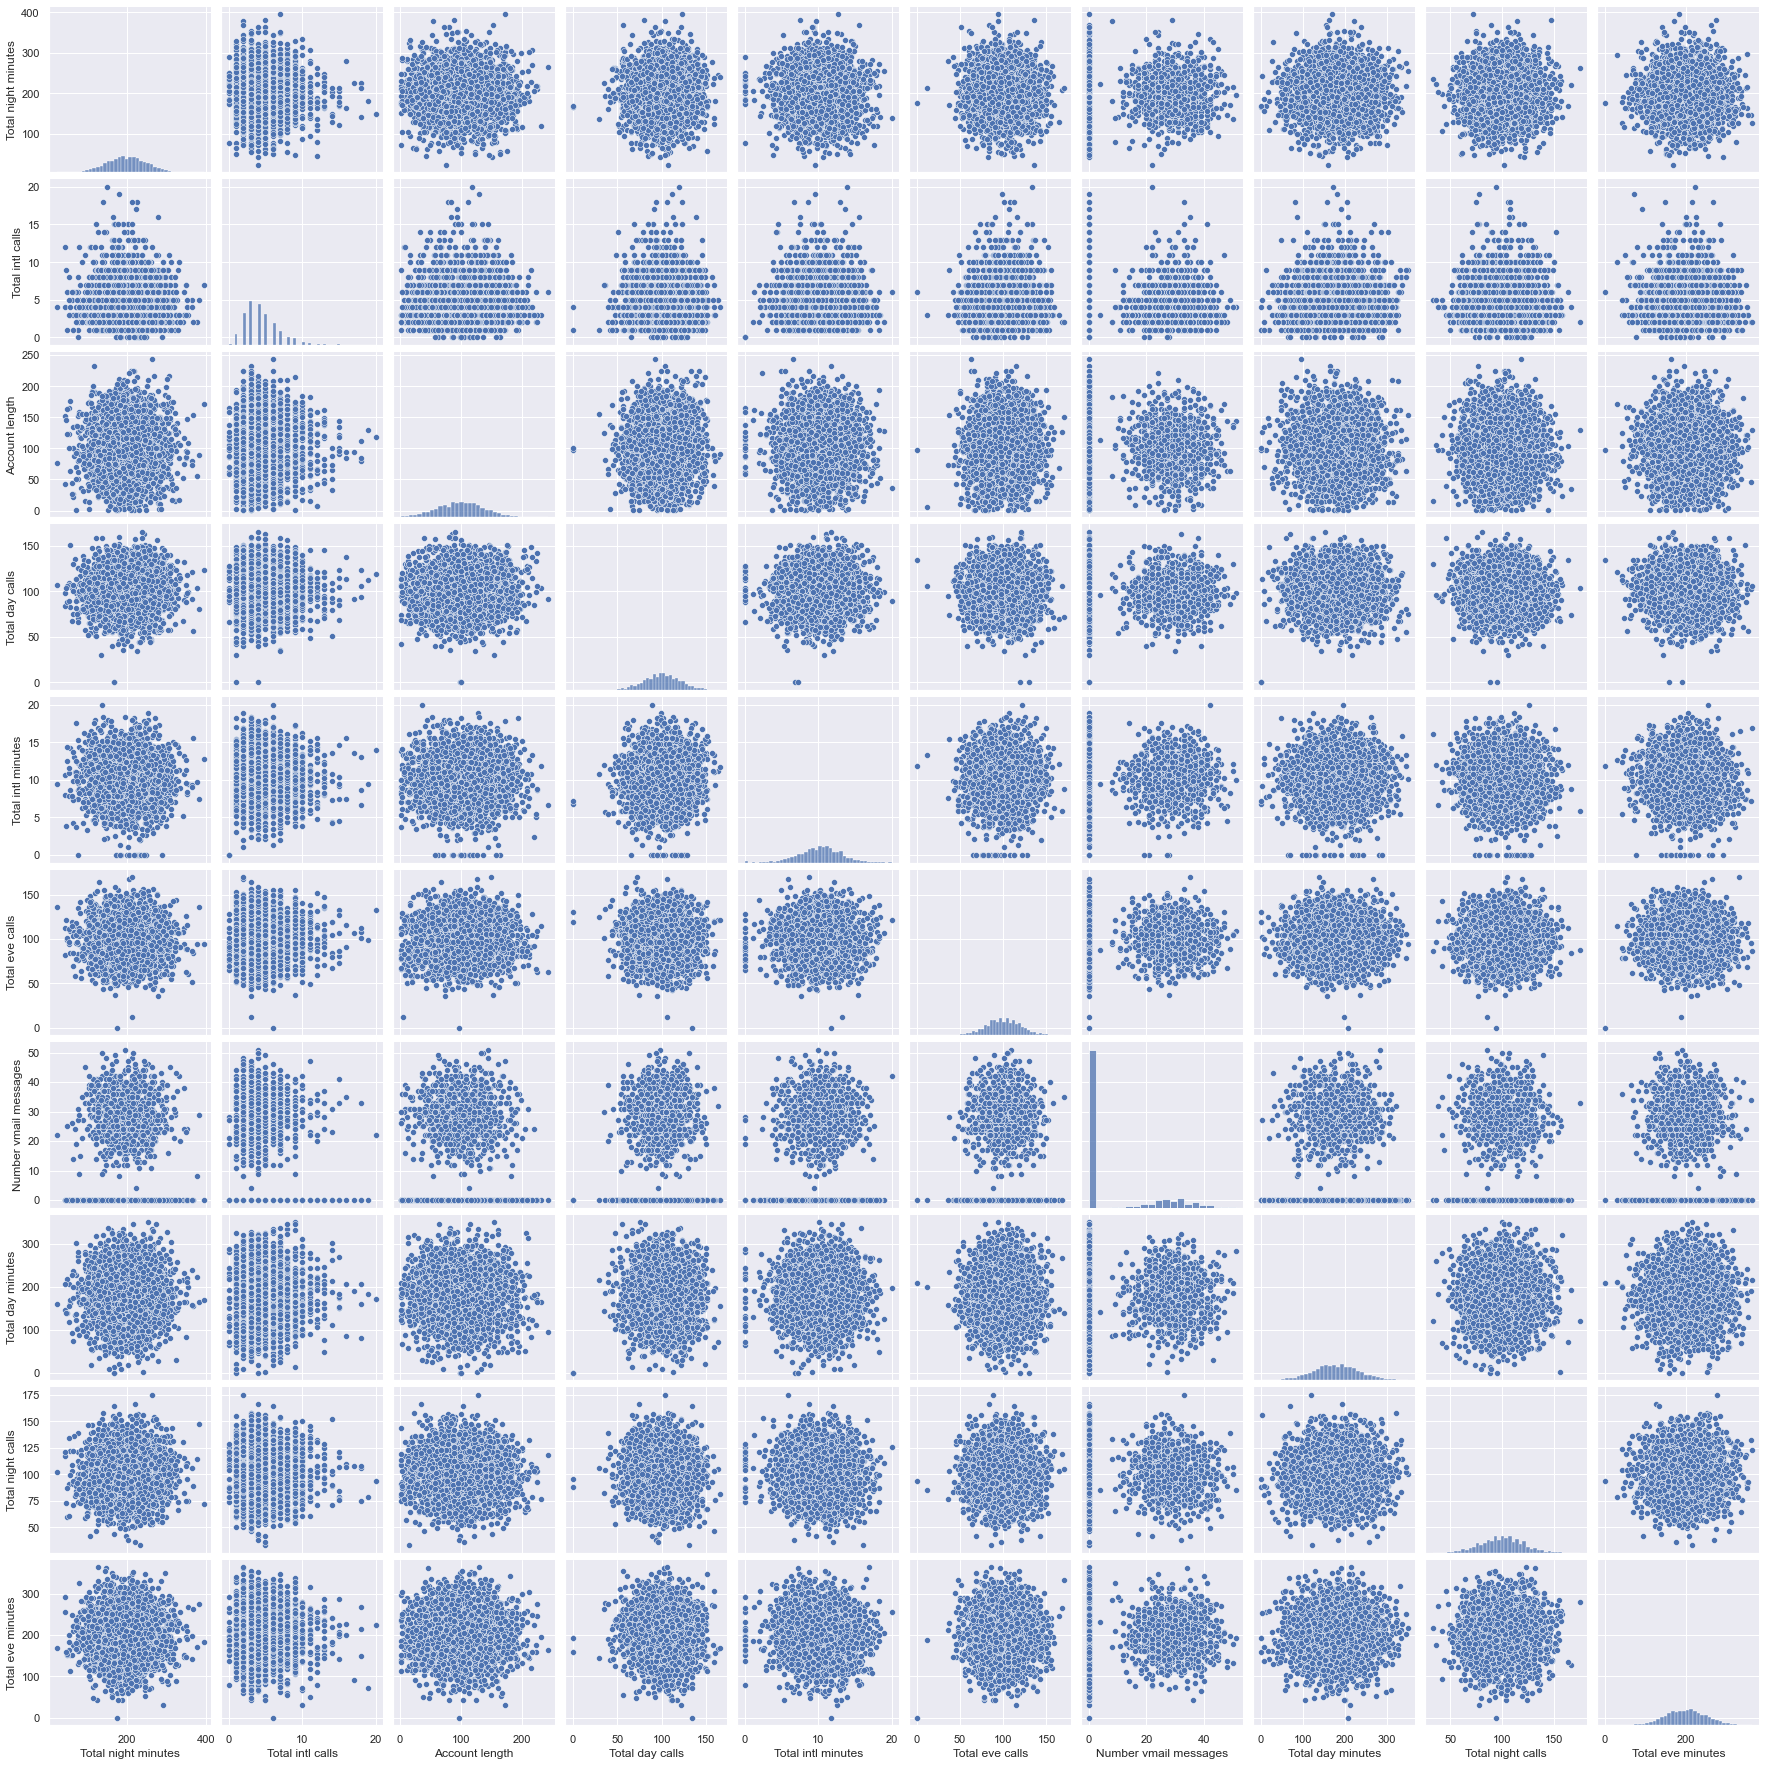

In [49]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])


#### 数量和类别

为了让图形更有趣一点，可以尝试从数值和类别特征的相互作用中得到预测 Churn 的新信息，更具体地，让我们看看输入变量和目标变量 Churn 的关系。使用 [<i class="fa fa-external-link-square" aria-hidden="true"> `lmplot()`</i>](https://seaborn.pydata.org/generated/seaborn.lmplot.html) 方法的 hue 参数来指定感兴趣的类别特征。


`lmplot`是用来绘制回归图

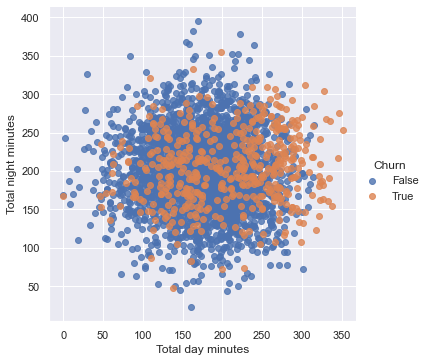

In [50]:
sns.lmplot("Total day minutes", "Total night minutes",
           data=df, hue="Churn", fit_reg=False)

现在，创建箱形图，以可视化忠实客户（Churn=0）和离网客户（Churn=1）这两个互斥分组中数值变量分布的统计数据。

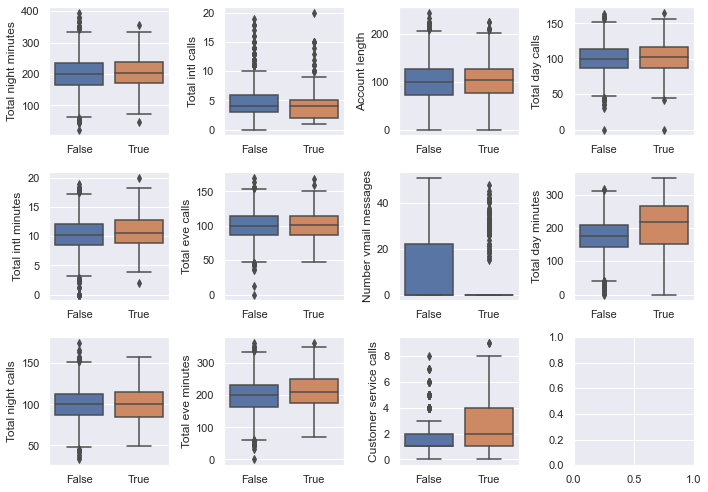

In [51]:
# 有时我们可以将有序变量作为数值变量分析
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx % 4]   # 很好的思路，定位不同的行，列
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

上面的图表表明，两组之间分歧最大的分布是这三个变量：Total day minutes 日通话分钟数、Customer service calls 客服呼叫数、Number vmail messages 语音邮件数。在后续的课程中，我们将学习如何使用随机森林（Random Forest）或梯度提升（Gradient Boosting）来判定特征对分类的重要性，届时可以清晰地看到，前两个特征对于离网预测模型而言确实非常重要。


创建箱型图和提琴形图，查看忠实客户和不忠实客户的日通话分钟数。

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

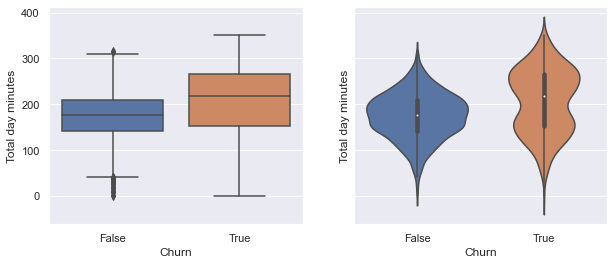

In [52]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])


上图表明，不忠实客户倾向于打更多的电话。<br />
我们还可以发现一个有趣的信息：平均而言，离网客户是通讯服务更活跃的用户。或许是他们对话费不满意，所以预防离网的一个可能措施是降低通话费。当然，公司需要进行额外的经济分析，以查明这样做是否真的有利。

当想要一次性分析两个类别维度下的数量变量时，可以用 seaborn 库的 [<i class="fa fa-external-link-square" aria-hidden="true"> `catplot()`</i>](https://seaborn.pydata.org/generated/seaborn.factorplot.html) 函数。例如，在同一图形中可视化 Total day minutes 日通话分钟数 和两个类别变量（Churn 和 Customer service calls）的相互作用。


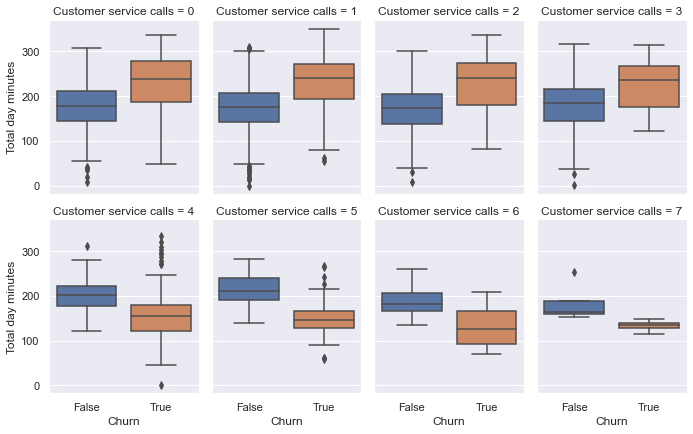

In [53]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
            data=df[df['Customer service calls'] < 8], kind="box",
            col_wrap=4, height=3, aspect=.8)

上图表明，从第 4 次客服呼叫开始，Total day minutes 日通话分钟数 可能不再是客户离网（Churn==1）的主要因素。也许，除了我们之前猜测的话费原因，还有其他问题导致客户对服务不满意，这可能会导致日通话分钟数更少。



#### 类别与类别

正如之前提到的，变量 Customer service calls 客服呼叫数 的重复值很多，因此，既可以看成数值变量，也可以看成有序类别变量。之前已通过计数图（count plot）查看过它的分布了，现在我们感兴趣的是这一有序特征和目标变量 Churn 离网率 之间的关系。


使用 `countplot()` 方法查看客服呼叫数的分布，这次传入 `hue=Churn` 参数，以便在图形中加入类别维度。


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

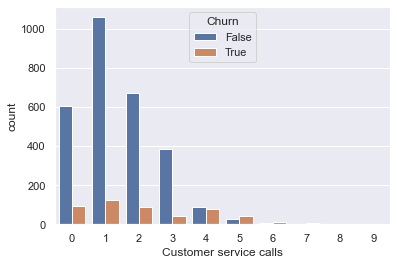

In [54]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)


上图表明，呼叫客服达到 4 次以上后，离网率显著增加了。



使用 `countplot()` 方法查看 Churn 离网率 和二元特征 International plan 国际套餐、Voice mail plan 语音邮件套餐 的关系。


<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

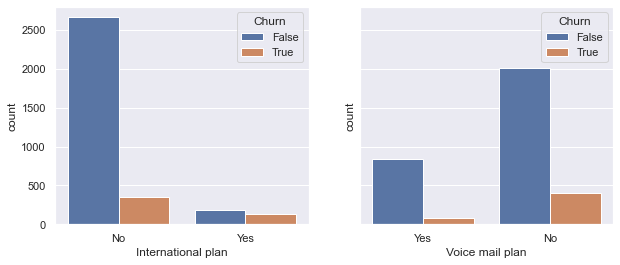

In [55]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1])

上图表明，开通国际套餐后，离网率会高很多，即 International plan 是否开通国际套餐 是一个重要的特征。我们在 Vocie mail plan 语音邮件套餐 特征上没有观察到类似的效果。



#### 交叉表

除了使用图形进行类别分析之外，还可以使用统计学的传统工具：交叉表（cross tabulation），即使用表格形式表示多个类别变量的频率分布。通过它可以查看某一列或某一行以了解某个变量在另一变量的作用下的分布情况。


In [57]:
# 通过交叉表查看 Churn 离网率 和类别变量 State 州 的关系。
pd.crosstab(df['State'], df['Churn'], margins=True).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,48,54,62,72,65,52,71,96,68,2850
True,3,8,11,4,9,9,12,5,9,8,...,5,18,10,5,8,14,7,10,9,483
All,52,80,55,64,34,66,74,54,61,63,...,53,72,72,77,73,66,78,106,77,3333


上表显示，State 州 有 51 个不同的值，并且每个州只有 3 到 17 个客户抛弃了运营商。通过 groupby() 方法计算每个州的离网率，由高到低排列。



In [59]:
df.groupby(['State'])['Churn'].agg(
    [np.mean]).sort_values(by='mean', ascending=False).T


State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


### 全局数据集可视化



上面我们一直在研究数据集的不同方面（facet），通过猜测有趣的特征并一次选择少量特征进行可视化。如果我们想一次性显示所有特征并仍然能够解释生成的可视化，该怎么办？


#### 降维

大多数现实世界的数据集有很多特征，每一个特征都可以被看成数据空间的一个维度。因此，我们经常需要处理高维数据集，然而可视化整个高维数据集相当难。为了从整体上查看一个数据集，需要在不损失很多数据信息的前提下，降低用于可视化的维度。这一任务被称为降维（dimensionality reduction）。降维是一个无监督学习（unsupervised learning）问题，因为它需要在不借助任何监督输入（如标签）的前提下，从数据自身得到新的低维特征。


主成分分析（Principal Component Analysis, PCA）是一个著名的降维方法，我们会在之后的课程中讨论它。但主成分分析的局限性在于，它是线性（linear）算法，这意味着对数据有某些特定的限制。

与线性方法相对的，有许多非线性方法，统称流形学习（Manifold Learning）。著名的流形学习方法之一是 t-SNE。

#### t-SNE

它的基本思路很简单：为高维特征空间在二维平面（或三维平面）上寻找一个投影，使得在原本的 n 维空间中相距很远的数据点在二维平面上同样相距较远，而原本相近的点在平面上仍然相近。

该数据库创建一个 [<i class="fa fa-external-link-square" aria-hidden="true"> t-SNE</i>](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) 表示，首先加载依赖。


In [62]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


去除 State 州 和 Churn 离网率 变量，然后用 [<i class="fa fa-external-link-square" aria-hidden="true"> `pandas.Series.map()`</i>](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) 方法将二元特征的「Yes」/「No」转换成数值。
 :

In [60]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})


使用 `StandardScaler()` 方法来完成归一化数据，即从每个变量中减去均值，然后除以标准差。

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# 现在可以构建 t-SNE 表示了。
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

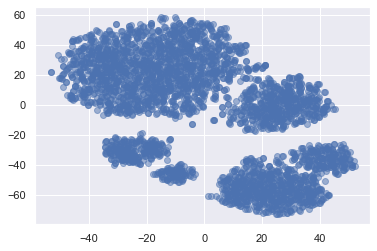

In [68]:
# 然后以图形的方式可视化。
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

根据离网情况给 t-SNE 表示加上色彩（蓝色表示忠实用户，黄色表示不忠实用户），形成离网情况散点图。



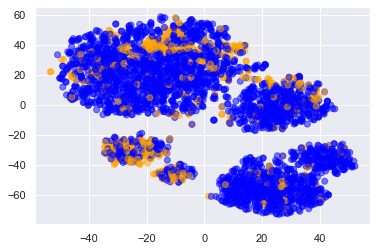

In [69]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5)


可以看到，离网客户集中在低维特征空间的一小部分区域。为了更好地理解这一图像，可以使用剩下的两个二元特征，即 International plan 国际套餐 和 Voice mail plan 语音邮件套餐 给图像着色，蓝色代表二元特征的值为 Yes，黄色代表二元特征的值为 No。


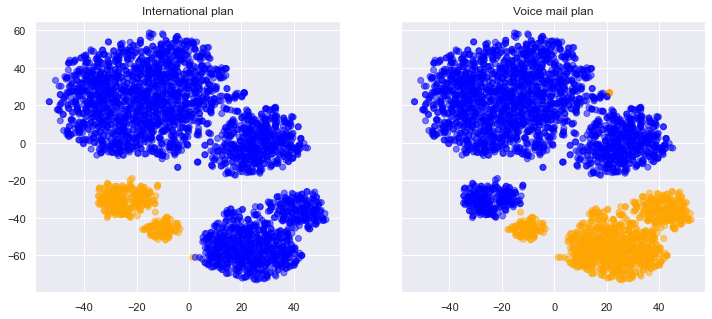

In [70]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5)
    axes[i].set_title(name)


通过上面 3 张图，我们就可以更直观的分析客户的离网原因了。

最后，了解下 t-SNE 的缺陷。

- 计算复杂度高。如果你有大量样本，你应该使用 [<i class="fa fa-external-link-square" aria-hidden="true"> Multicore-TSNE</i>](https://github.com/DmitryUlyanov/Multicore-TSNE)。

- 随机数种子的不同会导致图形大不相同，这给解释带来了困难。通常而言，你不应该基于这些图像做出任何决定性的结论，因为它可能和单纯的猜测差不多。当然，t-SNE 图像中的某些发现可能会启发一个想法，这个想法可以通过更全面深入的研究得到确认。

### 实验总结

本章节首先介绍了 Pandas、Matplotlib 和 seaborn 库的一些常用可视化方法，并对客户离网数据集进行了可视化分析和 t-SNE 降维。可视化是一个相对快捷的从数据中挖掘信息的手段，因此，学习这一技术并将其纳入你的日常机器学习工具箱，是很有必要的。

<i class="fa fa-link" aria-hidden="true"> 相关链接</i>

- 本文所用库的官方文档： [<i class="fa fa-external-link-square" aria-hidden="true"> Matplotlib</i>](https://matplotlib.org/contents.html), [<i class="fa fa-external-link-square" aria-hidden="true"> seaborn</i>](https://seaborn.pydata.org/introduction.html) 和 [<i class="fa fa-external-link-square" aria-hidden="true"> Pandas</i>](https://pandas.pydata.org/pandas-docs/stable/).
- 使用 seaborn 绘图的示例 [<i class="fa fa-external-link-square" aria-hidden="true"> Gallery</i>](http://seaborn.pydata.org/examples/index.html)。
- scikit-learn 的流形学习文档 [<i class="fa fa-external-link-square" aria-hidden="true"> Documentation</i>](http://scikit-learn.org/stable/modules/manifold.html)。
- 高效的 t-SNE 实现 [<i class="fa fa-external-link-square" aria-hidden="true"> Multicore-TSNE</i>](https://github.com/DmitryUlyanov/Multicore-TSNE)。
- 如何有效使用 t-SNE [<i class="fa fa-external-link-square" aria-hidden="true"> Distill.pub</i>](https://distill.pub/2016/misread-tsne/)。
- [<i class="fa fa-external-link-square" aria-hidden="true"> 了解蓝桥云课《楼+ 机器学习和数据挖掘课程》</i>](https://www.lanqiao.cn/louplus/)